### 방한 외래관광객

- 목적 : 방한 외래관광객의 성별, 연령대, 목적을 파악하여 한국의 관광산업의 타겟층을 설정하기

[1] 모듈 로딩 및 데이터 준비 <hr>

In [28]:
# [1-1] 모듈 로딩 및 데이터 준비
import pandas as pd  # 데이터 분석 및 전처리 관련 모듈
import numpy as np   # 배열(array) 파이썬 구현 관련 모듈
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family="Malgun Gothic")

In [29]:
# [1-2] 데이터 준비
FILE_gender = './gender.csv'
FILE_age = './age.csv'
FILE_purpose = './purpose.csv'

[2] 데이터 로딩 및 확인 <hr>

In [30]:
# [2-1] 데이터 로딩
genderDF = pd.read_csv(FILE_gender)  
genderDF

ageDF = pd.read_csv(FILE_age)  
ageDF

purposeDF = pd.read_csv(FILE_purpose)
purposeDF

genderDF

# airportDF = pd.read_csv(FILE_airport)
# airportDF


,기준일자,주요국가대륙명,국가명,성별,인원,전년동기,증감률
0,2018,아시아,중국,남성,1910231,1709407,11.7
1,2018,아시아,중국,여성,2734297,2289364,19.4
2,2018,아시아,중국,승무원,144984,170582,-15.0
3,2018,아시아,일본,남성,1090814,923587,18.1
4,2018,아시아,일본,여성,1830546,1357010,34.9
...,...,...,...,...,...,...,...
1075,2023,기타,기타,여성,52,37,40.5
1076,2023,기타,기타,승무원,61,65,-6.2
1077,2023,교포,교포,남성,17386,12203,42.5
1078,2023,교포,교포,여성,23277,15790,47.4


In [31]:
# [2-1] 데이터 확인(1) - genderDF
# 1. 요약 정보 info()
print('<genderDF의 info>')
genderDF.info()


# 2. 통계치 확인 describe()
print('\n\n<genderDF의 describe>')
print(genderDF.describe(include='all'))


# 3. 결측치 확인 isnull().sum()
print('\n\n', genderDF.isnull().sum())


# 4. 실제 데이터 확인 head(), tail()
print(genderDF.head(4))
print(genderDF.tail(4))


<genderDF의 info>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준일자     1080 non-null   int64  
 1   주요국가대륙명  1080 non-null   object 
 2   국가명      1080 non-null   object 
 3   성별       1080 non-null   object 
 4   인원       1080 non-null   int64  
 5   전년동기     1080 non-null   int64  
 6   증감률      1080 non-null   float64
dtypes: float64(1), int64(3), object(3)
memory usage: 59.2+ KB


<genderDF의 describe>
               기준일자 주요국가대륙명   국가명    성별            인원          전년동기  \
count   1080.000000    1080  1080  1080  1.080000e+03  1.080000e+03   
unique          NaN       7    55     3           NaN           NaN   
top             NaN     아시아    기타    남성           NaN           NaN   
freq            NaN     450   108   360           NaN           NaN   
mean    2020.500000     NaN   NaN   NaN  4.681985e+04  4.895327e+04   
std        1.708616    

In [32]:
# [2-1] 데이터 확인(2) - ageDF
# 1. 요약 정보 info()
print('<ageDF의 info>')
ageDF.info()


# 2. 통계치 확인 describe()
print('\n\n<ageDF의 describe>')
print(ageDF.describe(include='all'))


# 3. 결측치 확인 isnull().sum() 및 처리 dropna()
print('\n\n', ageDF.isnull().sum())
ageDF = ageDF.dropna()


# 4. 실제 데이터 확인  head(), tail()
print(ageDF.head(2))
print(ageDF.tail(2))

<ageDF의 info>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3971 entries, 0 to 3970
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준일자     3971 non-null   object 
 1   주요국가대륙명  3971 non-null   object 
 2   국가명      3960 non-null   object 
 3   연령       3971 non-null   object 
 4   인원       3971 non-null   float64
 5   전년동기     3971 non-null   float64
 6   증감률      3971 non-null   float64
dtypes: float64(3), object(4)
memory usage: 217.3+ KB


<ageDF의 describe>
        기준일자 주요국가대륙명   국가명    연령            인원          전년동기           증감률
count   3971    3971  3960  3971  3.971000e+03  3.971000e+03   3971.000000
unique     7       8    55    11           NaN           NaN           NaN
top     2018     아시아    기타  0~9세           NaN           NaN           NaN
freq     660    1650   396   361           NaN           NaN           NaN
mean     NaN     NaN   NaN   NaN  5.094793e+04  5.325344e+04    232.152506
std      NaN  

In [33]:
# [2-1] 데이터 확인(3) - purposeDF
# 1. 요약 정보 info()
print('<purposeDF의 info>')
purposeDF.info()


# 2. 통계치 확인 describe()
print('\n\n<purposeDF의 describe>')
print(purposeDF.describe(include='all'))


# 3. 결측치 확인 isnull().sum() 및 처리 dropna()
print('\n\n', purposeDF.isnull().sum())
purposeDF = purposeDF.dropna()


# 4. 실제 데이터 확인  head(), tail()
print(purposeDF.head(2))
print(purposeDF.tail(2))

<purposeDF의 info>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2045 entries, 0 to 2044
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   기준일자     2045 non-null   object 
 1   주요국가대륙명  2045 non-null   object 
 2   국가명      2040 non-null   object 
 3   목적구분     2045 non-null   object 
 4   인원       2045 non-null   float64
 5   전년동기     2045 non-null   float64
 6   증감률      2045 non-null   float64
dtypes: float64(3), object(4)
memory usage: 112.0+ KB


<purposeDF의 describe>
        기준일자 주요국가대륙명   국가명  목적구분            인원          전년동기           증감률
count   2045    2045  2040  2045  2.045000e+03  2.045000e+03   2045.000000
unique     7       9    57     5           NaN           NaN           NaN
top     2018     아시아  연도대륙    관광           NaN           NaN           NaN
freq     340     780   210   409           NaN           NaN           NaN
mean     NaN     NaN   NaN   NaN  9.890159e+04  1.033838e+05    130.620391
std   

[3] 데이터 전처리 <hr>

In [34]:
# [3-1] 데이터 전처리 - genderDF
# [성별] 컬럼 값 unique() 확인 >>> '승무원'은 별도의 출국절차를 밟아 출국하여 남녀 구분이 되지 않음
print(genderDF['성별'].unique())

# '승무원' 값 drop() 삭제
genderDF = genderDF.drop(genderDF[genderDF['성별'] == '승무원'].index)

# 삭제됐는지 head() 확인 
genderDF.head(5)

['남성' '여성' '승무원']


,기준일자,주요국가대륙명,국가명,성별,인원,전년동기,증감률
0,2018,아시아,중국,남성,1910231,1709407,11.7
1,2018,아시아,중국,여성,2734297,2289364,19.4
3,2018,아시아,일본,남성,1090814,923587,18.1
4,2018,아시아,일본,여성,1830546,1357010,34.9
6,2018,아시아,대만,남성,359505,293093,22.7


In [35]:
# [3-1] 데이터 전처리 - ageDF
# (1)
# [연령] 컬럼 값 unique() 확인 >>> 연령 데이터가 아닌 값 '승무원', '전체' 확인
print(ageDF['연령'].unique())

# '승무원', '전체' 값 drop() 삭제
ageDF = ageDF.drop(ageDF[ageDF['연령'] == '승무원'].index)
ageDF = ageDF.drop(ageDF[ageDF['연령'] == '전체'].index)

# 삭제됐는지 tail() 확인
ageDF.tail(10)

['0~9세' '10~19세' '20~29세' '30~39세' '40~49세' '50~59세' '60~69세' '70~79세'
 '80세이상' '승무원' '전체']


,기준일자,주요국가대륙명,국가명,연령,인원,전년동기,증감률
3946,2023,기타,기타,80세이상,2.0,1.0,100.0
3949,2023,교포,교포,0~9세,0.0,11.0,-100.0
3950,2023,교포,교포,10~19세,1.0,45.0,-97.8
3951,2023,교포,교포,20~29세,2663.0,1641.0,62.3
3952,2023,교포,교포,30~39세,4030.0,2586.0,55.8
3953,2023,교포,교포,40~49세,6011.0,4586.0,31.1
3954,2023,교포,교포,50~59세,11017.0,8325.0,32.3
3955,2023,교포,교포,60~69세,10899.0,7418.0,46.9
3956,2023,교포,교포,70~79세,4746.0,2741.0,73.1
3957,2023,교포,교포,80세이상,1296.0,640.0,102.5


In [36]:
# [3-1] 데이터 전처리 - purposeDF
# [국가명] 컬럼 값 unique() 확인 >>> 연령 데이터가 아닌 값 '연도', '연도대륙' 확인
print(ageDF['국가명'].unique())

# '연도', '연도대륙' 값 drop() 삭제
ageDF = ageDF.drop(ageDF[ageDF['국가명'] == '연도'].index)
ageDF = ageDF.drop(ageDF[ageDF['국가명'] == '연도대륙'].index)

# 삭제됐는지 tail() 확인
ageDF.tail(5)

['중국' '일본' '대만' '홍콩' '마카오' '필리핀' '인도네시아' '태국' '베트남' '인도' '말레이시아' '싱가포르'
 '몽골' '우즈베키스탄' '미얀마' 'GCC' '카자흐스탄' '튀르키예' '캄보디아' '스리랑카' '방글라데시' '파키스탄'
 '이스라엘' '이란' '기타' '미국' '캐나다' '브라질' '멕시코' '러시아' '영국' '독일' '프랑스' '이탈리아'
 '네덜란드' '우크라이나' '스페인' '루마니아' '노르웨이' '스웨덴' '폴란드' '스위스' '포르투갈' '오스트리아' '핀란드'
 '벨기에' '크로아티아' '그리스' '불가리아' '덴마크' '아일랜드' '호주' '뉴질랜드' '남아프리카공화국' '교포']


,기준일자,주요국가대륙명,국가명,연령,인원,전년동기,증감률
3953,2023,교포,교포,40~49세,6011.0,4586.0,31.1
3954,2023,교포,교포,50~59세,11017.0,8325.0,32.3
3955,2023,교포,교포,60~69세,10899.0,7418.0,46.9
3956,2023,교포,교포,70~79세,4746.0,2741.0,73.1
3957,2023,교포,교포,80세이상,1296.0,640.0,102.5


In [37]:
# [3-1] 데이터 전처리 - purposeDF
# [국가명] 컬럼 값 unique() 확인 >>> 연령 데이터가 아닌 값 '연도', '연도대륙' 확인
print(purposeDF['국가명'].unique())

# '연도', '연도대륙' 값 drop() 삭제
purposeDF = purposeDF.drop(purposeDF[purposeDF['국가명'] == '연도'].index)
purposeDF = purposeDF.drop(purposeDF[purposeDF['국가명'] == '연도대륙'].index)

# 삭제됐는지 head() 확인
purposeDF.head(5)

['연도' '연도대륙' '중국' '일본' '대만' '홍콩' '마카오' '필리핀' '인도네시아' '태국' '베트남' '인도'
 '말레이시아' '싱가포르' '몽골' '우즈베키스탄' '미얀마' 'GCC' '카자흐스탄' '튀르키예' '캄보디아' '스리랑카'
 '방글라데시' '파키스탄' '이스라엘' '이란' '기타' '미국' '캐나다' '브라질' '멕시코' '러시아' '영국' '독일'
 '프랑스' '이탈리아' '네덜란드' '우크라이나' '스페인' '루마니아' '노르웨이' '스웨덴' '폴란드' '스위스' '포르투갈'
 '오스트리아' '핀란드' '벨기에' '크로아티아' '그리스' '불가리아' '덴마크' '아일랜드' '호주' '뉴질랜드'
 '남아프리카공화국' '교포']


,기준일자,주요국가대륙명,국가명,목적구분,인원,전년동기,증감률
10,2018,아시아,중국,관광,3701973.0,3116505.0,18.8
11,2018,아시아,중국,상용,42257.0,42861.0,-1.4
12,2018,아시아,중국,공용,4014.0,1998.0,100.9
13,2018,아시아,중국,유학연수,213930.0,202658.0,5.6
14,2018,아시아,중국,기타,827338.0,805331.0,2.7


[4] 데이터 분석 <hr>

In [38]:
# [4-1] 데이터 분석 - genderDF
# 성별의 합계
sum_by_gender = genderDF.groupby(['성별'])['인원'].sum()
print(sum_by_gender)
print()
# >>>> 여자가 한국에 더 많이 방문


# 방한 외래관광객 연도별 성별의 합계
sum_by_year_gender = genderDF.groupby(['기준일자','성별'])['인원'].sum()
print(sum_by_year_gender)
print()
# >>>> 코로나 전까지는 여자가 많이 방문하였으나, 코로나 때는 남자가 더 많이 방문
#      코로나 종식 이후에는 다시 여자가 많이 방문하는 중
#      그러나 아직까지 2018년 수준의 방한 외래관광객 수까지 회복하진 못했음


# 방한 외래관광객 by gender 최대값
max_by_gender = genderDF.max()
max_by_gender = genderDF[genderDF['인원'] == 3627467]
print(max_by_gender)
# >>>> 가장 많이 방문한 방한 외래관광객은 중국 여성들


성별
남성    19948563
여성    26577148
Name: 인원, dtype: int64

기준일자  성별
2018  남성    6229185
      여성    8195792
2019  남성    6768303
      여성    9695380
2020  남성     978594
      여성    1156517
2021  남성     335894
      여성     196694
2022  남성    1403186
      여성    1290033
2023  남성    4233401
      여성    6042732
Name: 인원, dtype: int64

     기준일자 주요국가대륙명 국가명  성별       인원     전년동기   증감률
181  2019     아시아  중국  여성  3627467  2734297  32.7


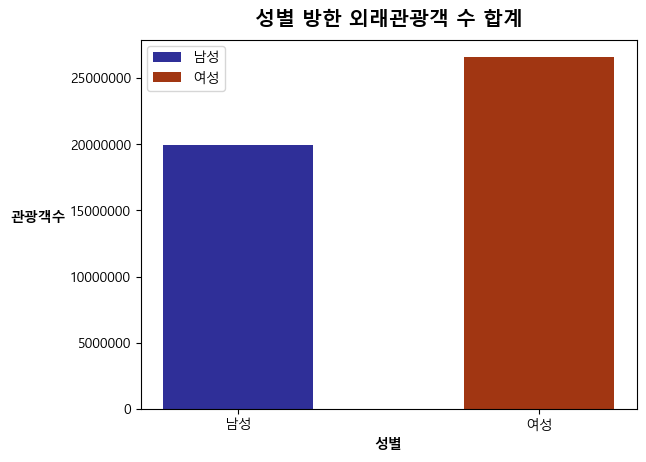

In [39]:
# ========== genderDF 분석 결과 시각화 ==========
# (1) 성별의 합계
xData = sum_by_gender.index
yData = [int(sum_by_gender['남성']),int(sum_by_gender['여성'])]
plt.bar(xData, yData, color=['#2F2F98','#A13612'], label=['남성','여성'], width=0.5)
plt.title('성별 방한 외래관광객 수 합계',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('성별', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('관광객수', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.legend()
plt.show()


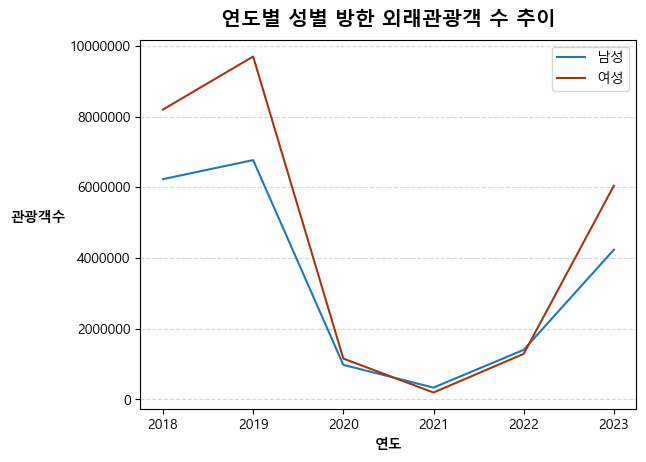

In [52]:
# ========== genderDF 분석 결과 시각화 ==========
# (2) 연도별 성별 방한 외래관광객 수 추이 
year = genderDF['기준일자'].unique()
xData = year

sum_gender = pd.DataFrame(sum_by_year_gender)
sum_gender

yData1 = []
yData2 = []
for idx in sum_gender.index:
    if idx[1] == '남성':
        yData1.append(sum_gender.loc[idx, '인원'])
    else:
        yData2.append(sum_gender.loc[idx, '인원'])

for idx in range(len(yData1)):
    yData1[idx] = int(yData1[idx])
    yData2[idx] = int(yData2[idx])

plt.plot(xData, yData1, label='남성')
plt.plot(xData, yData2, label='여성', color='#A13612')
plt.title('연도별 성별 방한 외래관광객 수 추이',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('연도', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('관광객수', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.legend()
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()




In [41]:
# [4-1] 데이터 분석 - ageDF
# 연령대별 합계
sum_by_age = ageDF.groupby(['연령'])['인원'].sum()
print(sum_by_age)
print()
# >>>> 20대, 30대가 가장 많이 방문


# 방한 외래관광객 연도별 성별의 합계
sum_by_year_age = ageDF.groupby(['기준일자','연령'])['인원'].sum()
print(sum_by_year_age)
print()
# >>>> 성별 분석과 마찬가지로 코로나 전보다 방한관광객이 감소한 추세
#      2023년도에도 코로나 전에 비해 절반 수준밖에 회복하지 못함


# 방한 외래관광객 by AGE 최대값
max_by_age = ageDF.max()
max_by_age = ageDF[ageDF['인원'] == 1793951.0]
print(max_by_age)
# >>>> 가장 많이 방문한 방한 외래관광객은 중국의 30대 여성


연령
0~9세       1359250.0
10~19세     2670680.0
20~29세    11914782.0
30~39세    11167297.0
40~49세     7672789.0
50~59세     6460248.0
60~69세     3943658.0
70~79세     1161656.0
80세이상       175351.0
Name: 인원, dtype: float64

기준일자  연령    
2018  0~9세       410589.0
      10~19세     790245.0
      20~29세    3643310.0
      30~39세    3461749.0
      40~49세    2442373.0
      50~59세    2058344.0
      60~69세    1236749.0
      70~79세     333000.0
      80세이상       48618.0
2019  0~9세       483985.0
      10~19세     920112.0
      20~29세    4151116.0
      30~39세    4011532.0
      40~49세    2697020.0
      50~59세    2283255.0
      60~69세    1456725.0
      70~79세     404682.0
      80세이상       55256.0
2020  0~9세        62089.0
      10~19세     110771.0
      20~29세     588378.0
      30~39세     531577.0
      40~49세     349870.0
      50~59세     287971.0
      60~69세     157692.0
      70~79세      41433.0
      80세이상        5330.0
2021  0~9세        15021.0
      10~19세      25892.0
      20~29세   

C:\Users\KDP-23\AppData\Local\Temp\ipykernel_6680\1407302193.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


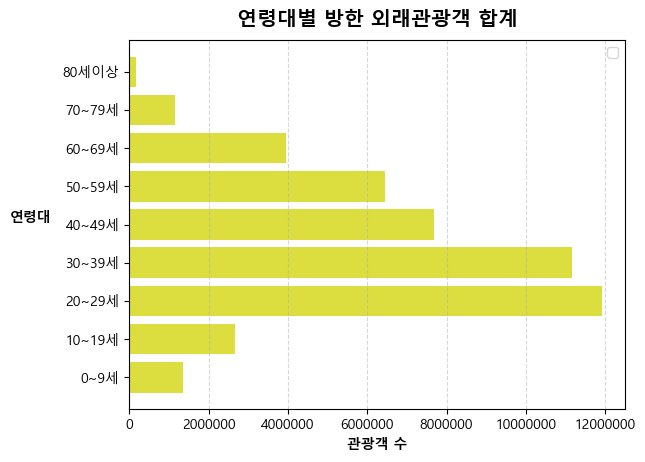

In [51]:
# ========== ageDF 분석 결과 시각화 ==========
# (1) 연령대별 합계
sum_age = pd.DataFrame(sum_by_age)
plt.barh(sum_age.index, sum_age.loc[sum_age.index,'인원'], color='#DCDE3F')

plt.title('연령대별 방한 외래관광객 합계',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('관광객 수', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('연령대', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.legend()
plt.ticklabel_format(axis='x',useOffset=False, style='plain')
plt.grid(axis='x', alpha=0.5, linestyle='--')
plt.show()


C:\Users\KDP-23\AppData\Local\Temp\ipykernel_6680\1645871495.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


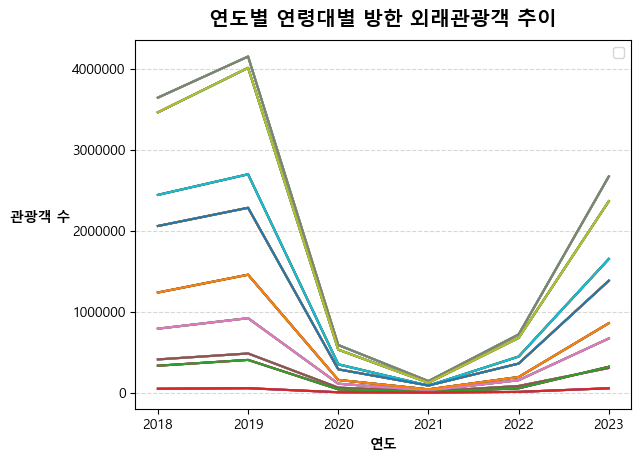

In [ ]:
# ========== ageDF 분석 결과 시각화 ==========
# (2) 연도별 연령대별 방한 외래관광객 추이

xData = year
year_age = pd.DataFrame(sum_by_year_age)

yData = []
for idx in range(len(year_age.index)):
     plt.plot(xData, year_age.xs(year_age.index[idx][1], level=1))

plt.title('연도별 연령대별 방한 외래관광객 추이',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('연도', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('관광객 수', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.legend()
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()


# 범례 삽입

In [44]:
# [4-1] 데이터 분석 - purposeDF
# 목적별 합계
sum_by_purpose = purposeDF.groupby(['목적구분'])['인원'].sum()
print(sum_by_purpose)
print()
# >>>> 관광 목적으로 방문하는 방한 외래관광객이 가장 많음


# 방한 외래관광객 목적별 합계
sum_by_year_purpose = purposeDF.groupby(['기준일자','목적구분'])['인원'].sum()
print(sum_by_year_purpose)
print()
# >>>> 관광객 수가 가장 많으나 코로나 전 수준으로 회복하진 못했음
#      그러나 유학연수 목적의 경우 코로나 전 수준으로 회복
#      상용 목적의 경우에도 코로나 전 수준으로 거의 회복


목적구분
공용        272804.0
관광      39591776.0
기타       8731698.0
상용        596767.0
유학연수     1372393.0
Name: 인원, dtype: float64

기준일자  목적구분
2018  공용         61017.0
      관광      12414348.0
      기타       2363956.0
      상용        175547.0
      유학연수      332011.0
2019  공용         74210.0
      관광      14432275.0
      기타       2442165.0
      상용        178445.0
      유학연수      375661.0
2020  공용         16571.0
      관광       1653471.0
      기타        701105.0
      상용         29509.0
      유학연수      118462.0
2021  공용         18685.0
      관광        211846.0
      기타        635098.0
      상용         21290.0
      유학연수       80084.0
2022  공용         35692.0
      관광       1998937.0
      기타        939023.0
      상용         72170.0
      유학연수      152195.0
2023  공용         66629.0
      관광       8880899.0
      기타       1650351.0
      상용        119806.0
      유학연수      313980.0
Name: 인원, dtype: float64



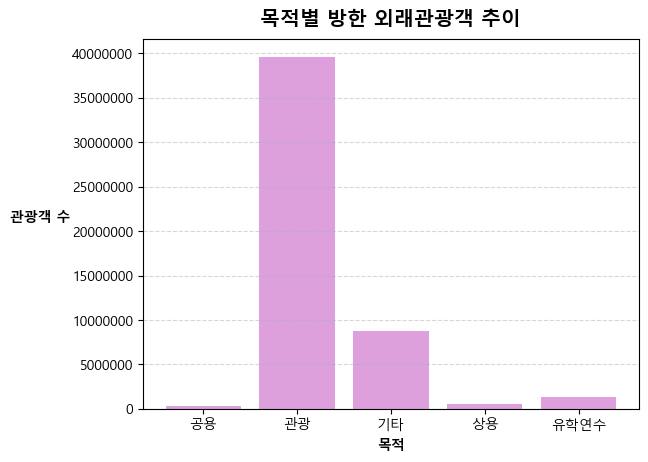

In [58]:
# ========== purposDF 분석 결과 시각화 ==========
# (1) 목적별 방한 외래관광객 추이
plt.bar(sum_by_purpose.index, sum_by_purpose, color='plum')

plt.title('목적별 방한 외래관광객 추이',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('목적', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('관광객 수', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()

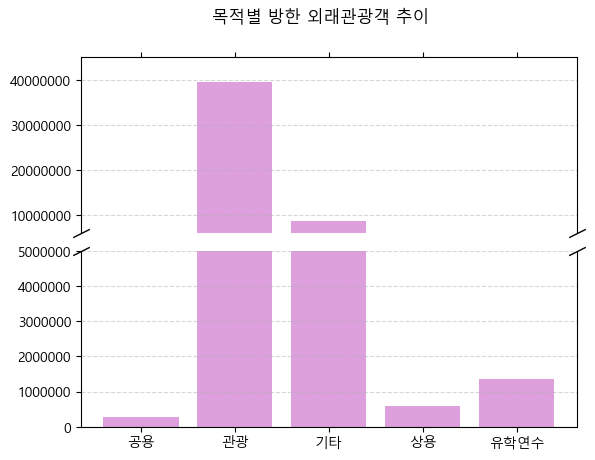

In [110]:
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
fig.subplots_adjust(hspace = 0.1)

ax1.bar(sum_by_purpose.index, sum_by_purpose, color='plum')
ax2.bar(sum_by_purpose.index, sum_by_purpose, color='plum')

# y축 범위 설정
ax1.set_ylim(6000000, 45000000) 
ax2.set_ylim(0, 5000000)

# 경계선 제거
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)
ax2.xaxis.tick_bottom()

# 물결 표시 삽입
kwargs = dict(marker=[(-1, -0.5), (1, 0.5)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# fig.xlabel('목적', labelpad=5, fontdict={'weight':'bold'})
# fig.ylabel('관광객 수', labelpad=23, rotation=0, fontdict={'weight':'bold'})


ax1.ticklabel_format(axis='y',useOffset=False, style='plain')
ax2.ticklabel_format(axis='y',useOffset=False, style='plain')
ax1.grid(axis='y', alpha=0.5, linestyle='--')
ax2.grid(axis='y', alpha=0.5, linestyle='--')
fig.suptitle('목적별 방한 외래관광객 추이')
plt.show()

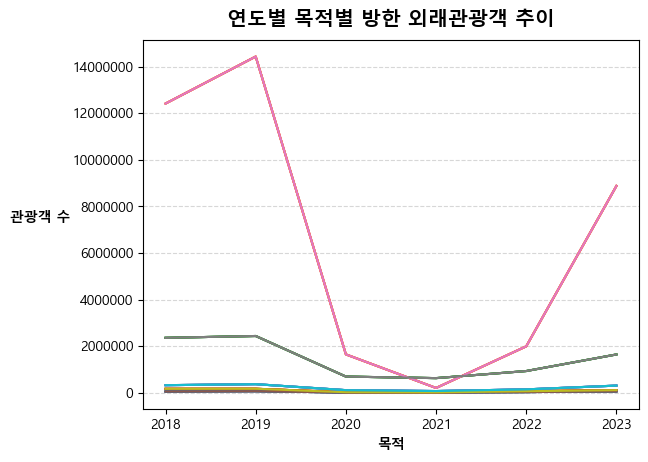

In [67]:
# ========== purposDF 분석 결과 시각화 ==========
# (2) 연도별 목적별 방한 외래관광객 추이
year_purpose = pd.DataFrame(sum_by_year_purpose)

yData = []
for idx in range(len(year_purpose.index)):
     plt.plot(xData, year_purpose.xs(year_purpose.index[idx][1], level=1)) # 멀티인덱스

plt.title('연도별 목적별 방한 외래관광객 추이',  pad=10, fontdict={'size':'x-large', 'weight':'bold'})
plt.xlabel('목적', labelpad=5, fontdict={'weight':'bold'})
plt.ylabel('관광객 수', labelpad=23, rotation=0, fontdict={'weight':'bold'})
plt.ticklabel_format(axis='y',useOffset=False, style='plain')
plt.grid(axis='y', alpha=0.5, linestyle='--')
plt.show()